<a href="https://colab.research.google.com/github/SENAMHI-SEA/REDES-NEURONALES-ARTIFICIALES/blob/main/Practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCCIÓN A LOS MODELOS DE CALIDAD DEL AIRE BASADOS EN INTELIGENCIA ARTIFICIAL**

Dirección de Meteorología y Evaluación Ambiental Atmosférica

Subdirección de Evaluación del Ambiente Atmosférico

# **Instalación de paquetes**

In [ ]:
!pip install ydata-profiling


# **PROCESAMIENTO Y ANÁLISIS DE LA BASE DE DATOS**

**Importación de librerias de python**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
from ydata_profiling import ProfileReport

plt.rcParams["font.family"] = "monospace"

**Preprocesamiento y análisis de la base de datos**

In [ ]:
# Ruta al archivo
ruta = "/content/drive/MyDrive/2025/CDM.csv"
# Leer el CSV
df = pd.read_csv(ruta, sep=";")
# Ver las primeras filas
print(df.head())


              date    PM10  temp    HR   PP   VV     DV
0  1/01/2018 00:00  123.20  21.7  79.0  0.0  1.2  224.0
1  1/01/2018 01:00  167.60  21.7  80.0  0.0  0.8  222.0
2  1/01/2018 02:00   76.65  21.4  80.0  0.0  0.5  251.0
3  1/01/2018 03:00   42.41  21.3  80.0  0.0  0.9  228.0
4  1/01/2018 04:00   36.36  21.1  80.0  0.0  0.7  236.0


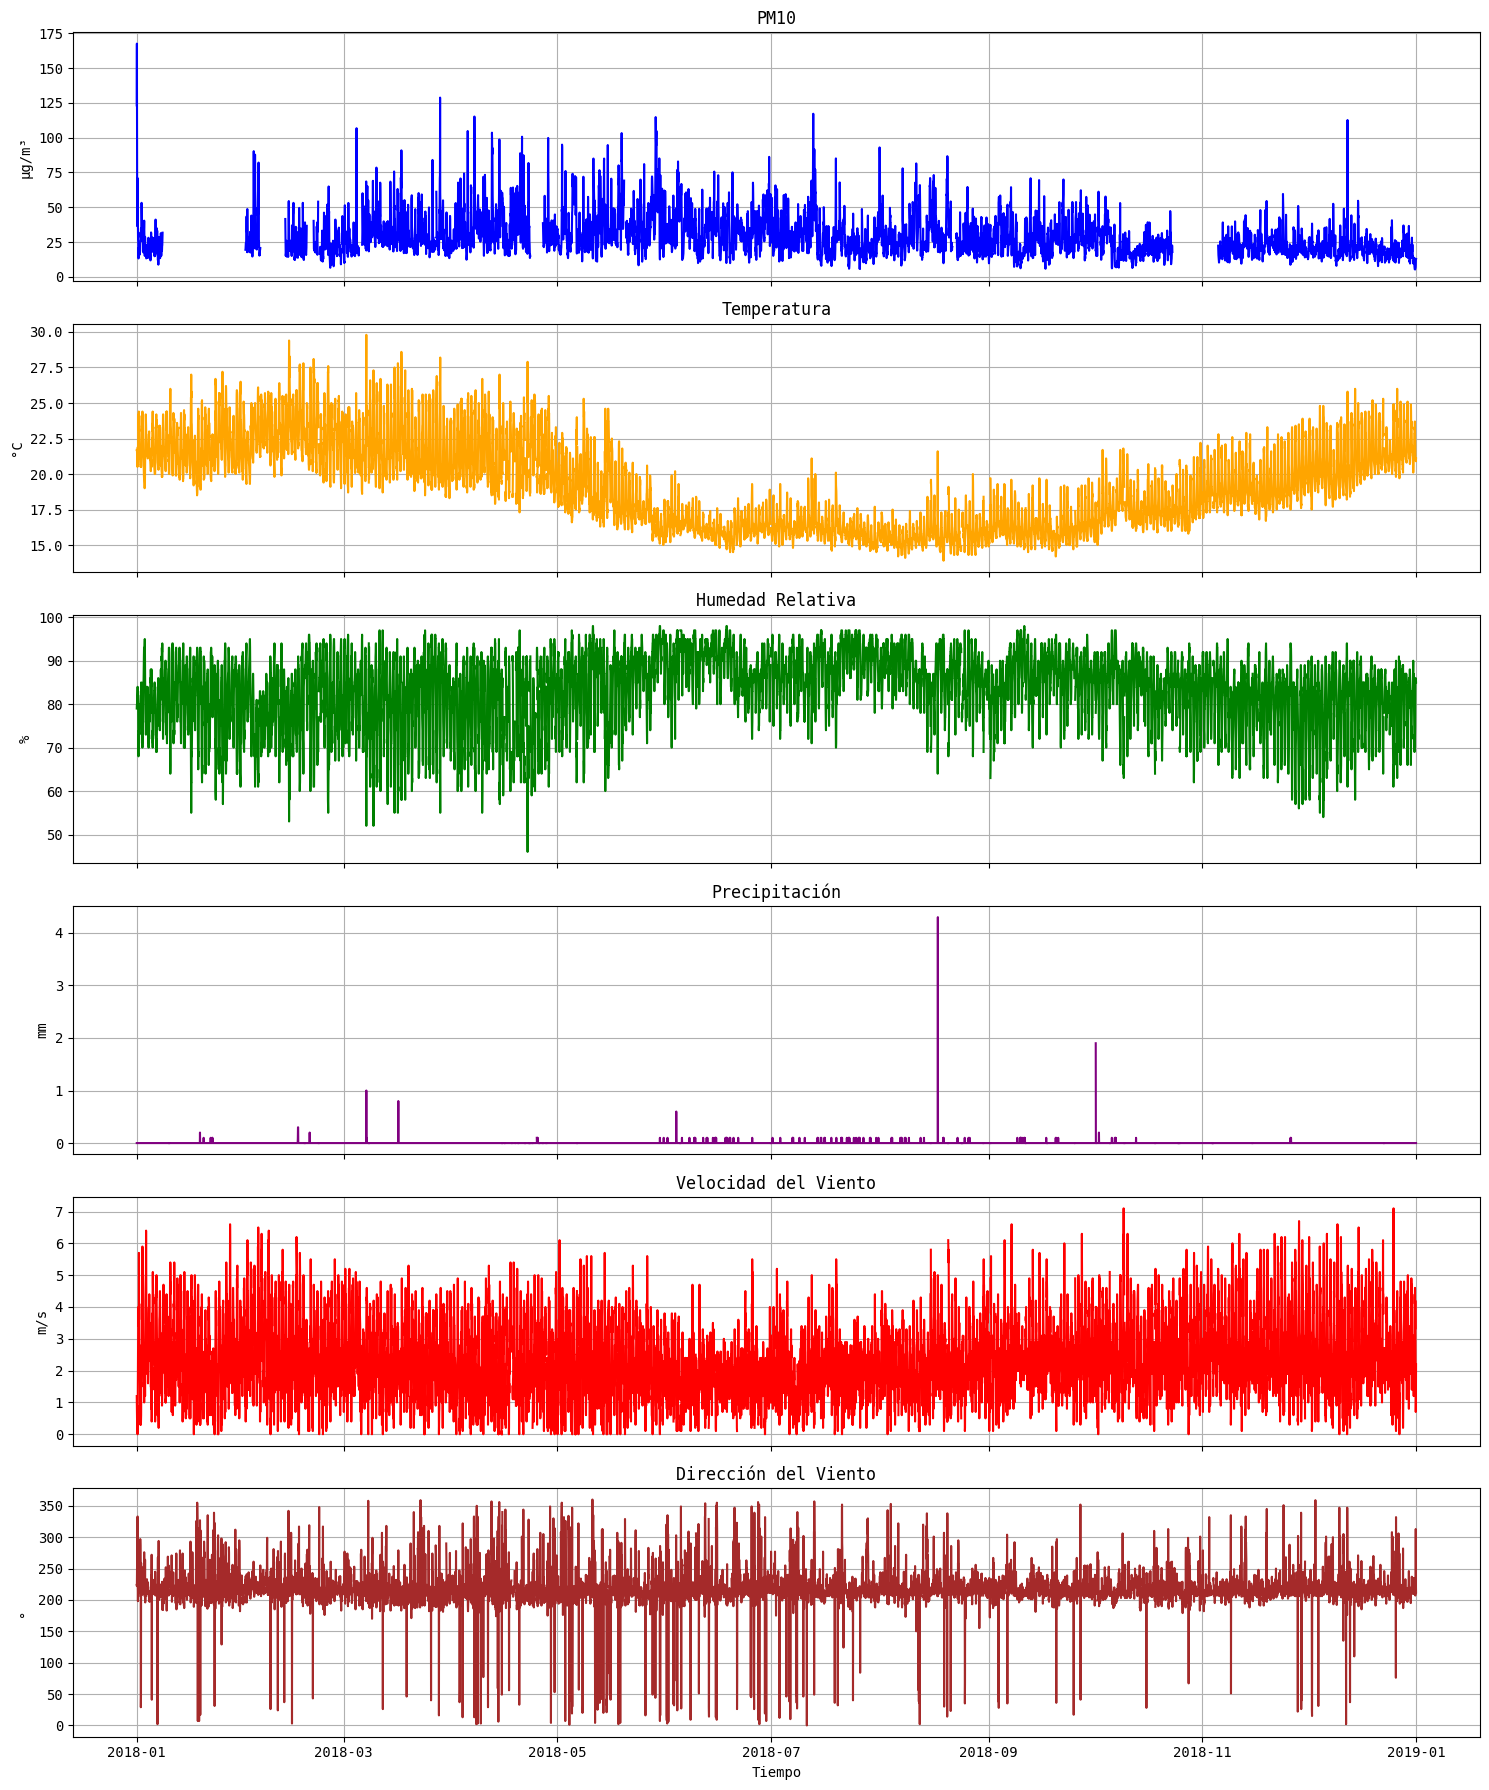

In [ ]:
# Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')

# Crear figura con 6 subplots (uno por variable)
fig, axs = plt.subplots(6, 1, figsize=(15, 18), sharex=True)

# Graficar cada variable
axs[0].plot(df['date'], df['PM10'], color='blue')
axs[0].set_ylabel('µg/m³')
axs[0].set_title('PM10')
axs[0].grid(True)

axs[1].plot(df['date'], df['temp'], color='orange')
axs[1].set_ylabel('°C')
axs[1].set_title('Temperatura')
axs[1].grid(True)

axs[2].plot(df['date'], df['HR'], color='green')
axs[2].set_ylabel('%')
axs[2].set_title('Humedad Relativa')
axs[2].grid(True)

axs[3].plot(df['date'], df['PP'], color='purple')
axs[3].set_ylabel('mm')
axs[3].set_title('Precipitación')
axs[3].grid(True)

axs[4].plot(df['date'], df['VV'], color='red')
axs[4].set_ylabel('m/s')
axs[4].set_title('Velocidad del Viento')
axs[4].grid(True)

axs[5].plot(df['date'], df['DV'], color='brown')
axs[5].set_ylabel('°')
axs[5].set_title('Dirección del Viento')
axs[5].grid(True)

# Etiqueta eje X solo al final
plt.xlabel('Tiempo')

plt.tight_layout()
plt.show()


In [ ]:
df = df

# Normalizar nombres de columnas
df.columns = df.columns.str.strip()

# Lista de contaminantes
contaminantes = ["PM10", "temp","HR","PP","VV","DV"]

# -------------------------------
# 3. Convertir contaminantes a numérico
# -------------------------------
for col in contaminantes:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce", downcast="float")

# -------------------------------
# 4. Diagnóstico de valores faltantes
# -------------------------------
print("Valores faltantes por contaminante:\n", df[contaminantes].isna().sum())

# -------------------------------
# 5. Limpieza de filas
# -------------------------------
# Opción A: eliminar filas donde TODOS los contaminantes son NaN
df_lenient = df.dropna(subset=contaminantes, how="all").copy()

# Opción B: eliminar filas donde CUALQUIER contaminante es NaN
df_strict = df.dropna(subset=contaminantes, how="any").copy()

print("\nDimensiones (leniente):", df_lenient.shape)
print("Dimensiones (estricta):", df_strict.shape)

# -------------------------------
# 6. Seleccionar columnas finales
# -------------------------------
# -> aquí decides cuál opción usar (lenient o strict)
df_final = df_strict[["date"] + contaminantes]

# -------------------------------
# 7. Resultado
# -------------------------------
print("\nEjemplo de datos limpios:")
print(df_final.head())

Valores faltantes por contaminante:
 PM10    1274
temp      64
HR        67
PP        70
VV        83
DV        75
dtype: int64

Dimensiones (leniente): (8746, 7)
Dimensiones (estricta): (7420, 7)

Ejemplo de datos limpios:
                 date        PM10       temp    HR   PP   VV     DV
0 2018-01-01 00:00:00  123.199997  21.700001  79.0  0.0  1.2  224.0
1 2018-01-01 01:00:00  167.600006  21.700001  80.0  0.0  0.8  222.0
2 2018-01-01 02:00:00   76.650002  21.400000  80.0  0.0  0.5  251.0
3 2018-01-01 03:00:00   42.410000  21.299999  80.0  0.0  0.9  228.0
4 2018-01-01 04:00:00   36.360001  21.100000  80.0  0.0  0.7  236.0


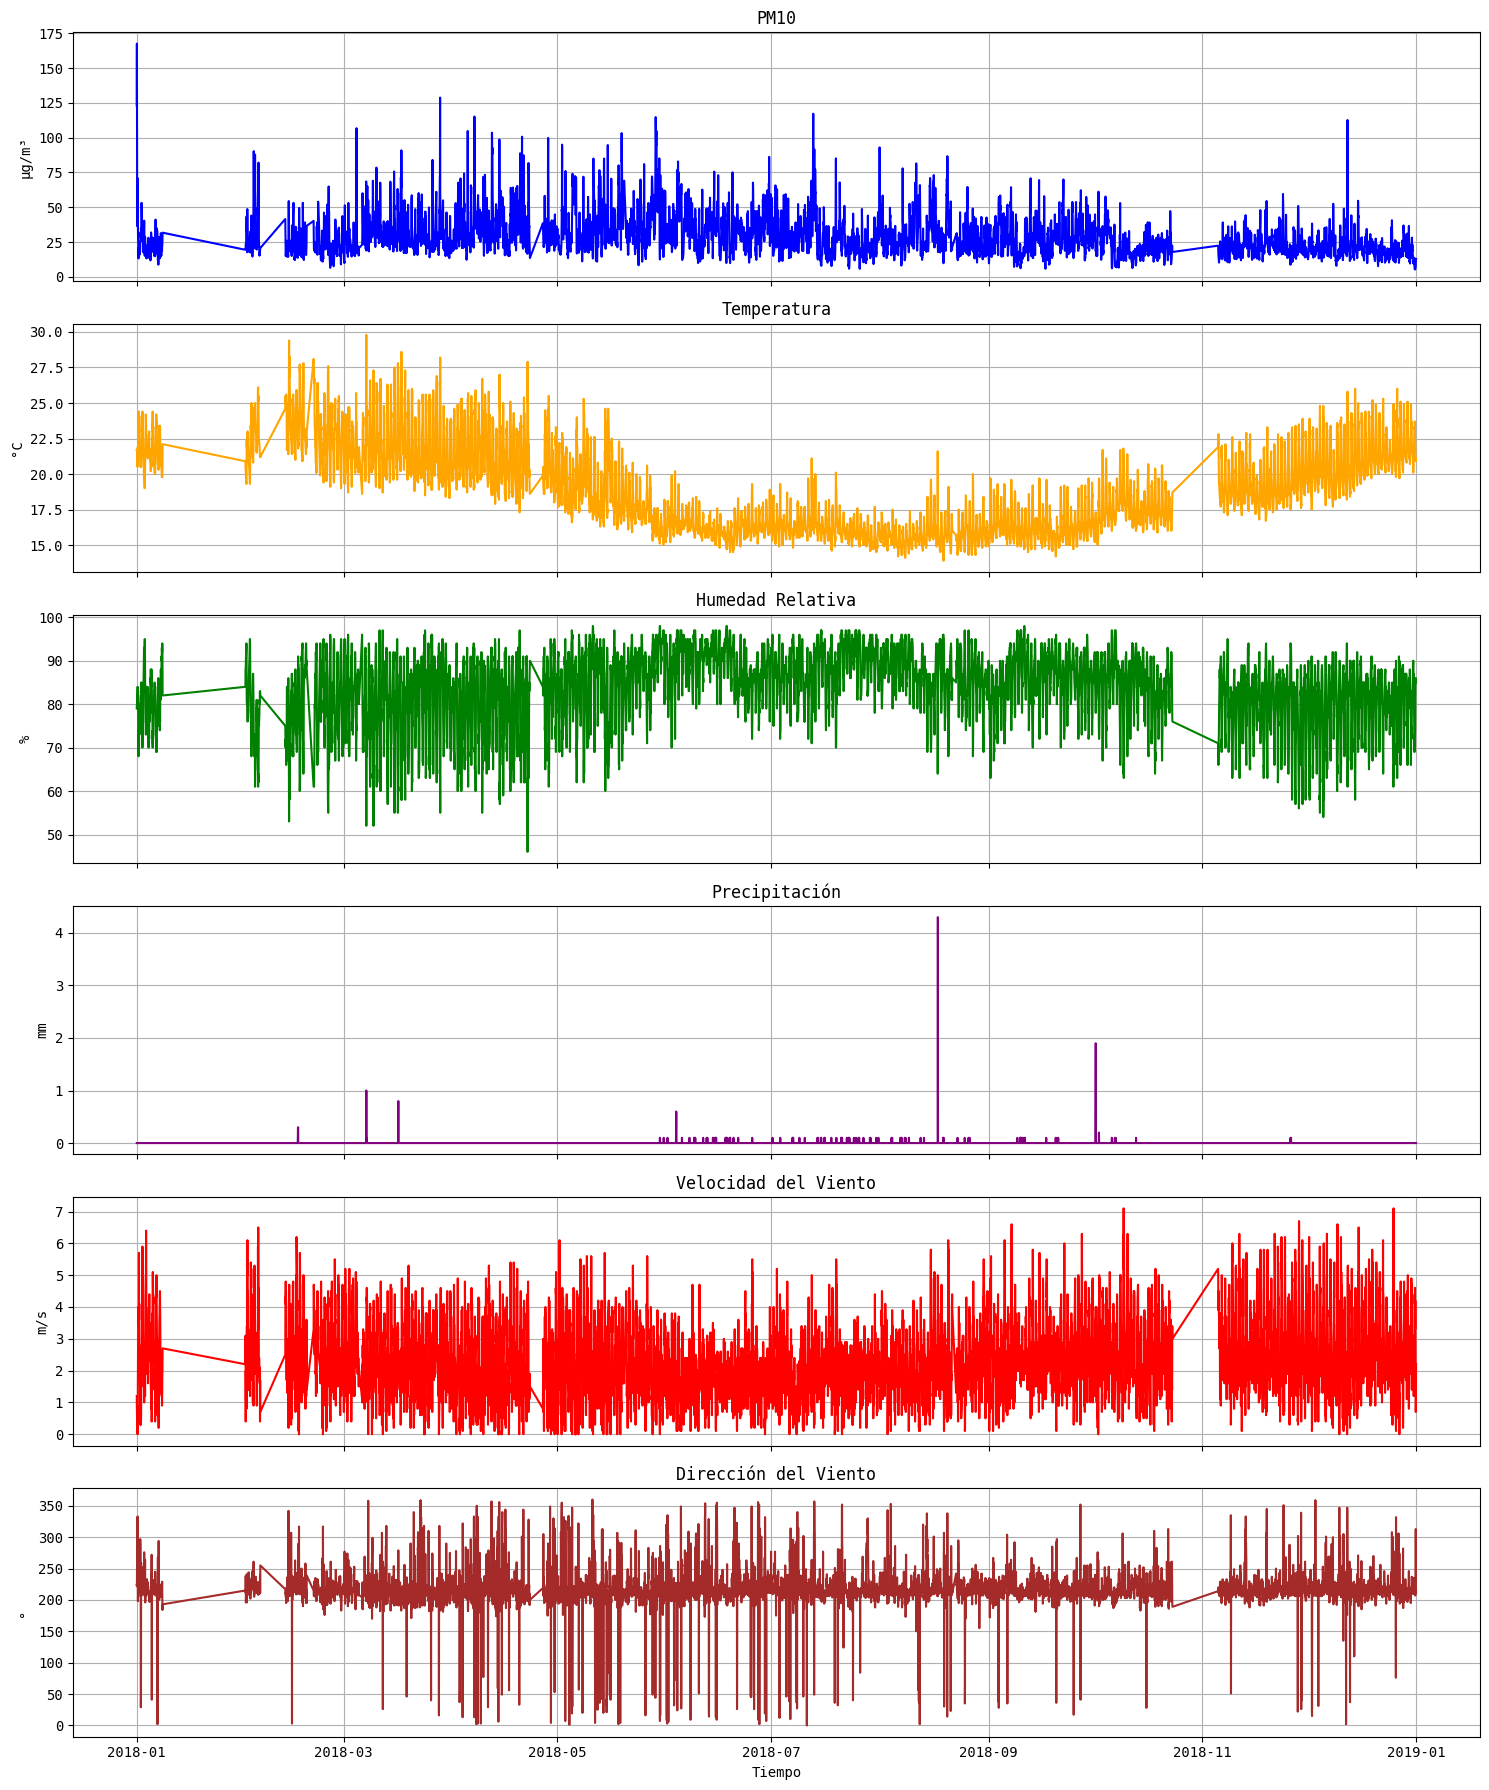

In [ ]:
# Convertir la columna 'date' a formato datetime
df_final['date'] = pd.to_datetime(df_final['date'], format='%d/%m/%Y %H:%M')

# Crear figura con 6 subplots (uno por variable)
fig, axs = plt.subplots(6, 1, figsize=(15, 18), sharex=True)

# Graficar cada variable
axs[0].plot(df_final['date'], df_final['PM10'], color='blue')
axs[0].set_ylabel('µg/m³')
axs[0].set_title('PM10')
axs[0].grid(True)

axs[1].plot(df_final['date'], df_final['temp'], color='orange')
axs[1].set_ylabel('°C')
axs[1].set_title('Temperatura')
axs[1].grid(True)

axs[2].plot(df_final['date'], df_final['HR'], color='green')
axs[2].set_ylabel('%')
axs[2].set_title('Humedad Relativa')
axs[2].grid(True)

axs[3].plot(df_final['date'], df_final['PP'], color='purple')
axs[3].set_ylabel('mm')
axs[3].set_title('Precipitación')
axs[3].grid(True)

axs[4].plot(df_final['date'], df_final['VV'], color='red')
axs[4].set_ylabel('m/s')
axs[4].set_title('Velocidad del Viento')
axs[4].grid(True)

axs[5].plot(df_final['date'], df_final['DV'], color='brown')
axs[5].set_ylabel('°')
axs[5].set_title('Dirección del Viento')
axs[5].grid(True)

# Etiqueta eje X solo al final
plt.xlabel('Tiempo')

plt.tight_layout()
plt.show()

In [ ]:
df_final.dtypes

date    datetime64[ns]
PM10           float32
temp           float32
HR             float32
PP             float32
VV             float32
DV             float32
dtype: object

In [ ]:
df_final.describe(exclude=[np.datetime64])

PM10         temp           HR           PP           VV  \
count  7420.000000  7420.000000  7420.000000  7420.000000  7420.000000   
mean     28.739180    18.739206    83.595146     0.002736     2.318423   
std      14.286340     2.929303     8.485562     0.058460     1.175622   
min       5.230000    13.900000    46.000000     0.000000     0.000000   
25%      19.027501    16.200001    79.000000     0.000000     1.500000   
50%      25.190001    18.100000    85.000000     0.000000     2.200000   
75%      34.590000    20.824999    90.000000     0.000000     3.000000   
max     167.600006    29.799999    98.000000     4.300000     7.100000   

                DV  
count  7420.000000  
mean    215.728027  
std      33.734303  
min       0.000000  
25%     208.000000  
50%     214.000000  
75%     223.000000  
max     360.000000

In [ ]:
ProfileReport(df_final, title="Reporte - CDM", explorative=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00, 64.41it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **IMPLEMENTACIÓN DE UNA RED NEURONAL ARTIFICIAL PARA PRONÓSTICO DE PM10**





**#FRAMEWORK**

PyTorch es un framework de aprendizaje profundo de código abierto desarrollado por Meta AI (Facebook) que se distingue por su diseño basado en grafos computacionales dinámicos (define-by-run). A diferencia de los frameworks estáticos, PyTorch construye el grafo de cómputo en tiempo de ejecución, lo que proporciona una gran flexibilidad para implementar arquitecturas no lineales, estructuras de control dinámicas (como bucles y condicionales dependientes de datos) y técnicas de depuración en línea. Esta característica lo convierte en una herramienta idónea tanto para la investigación en prototipado rápido de modelos como para la experimentación avanzada con arquitecturas neuronales complejas. Además, PyTorch integra un motor de autograd altamente optimizado que permite el cálculo automático de gradientes a través de operaciones tensores arbitrarias, soporta ejecución en CPU y GPU mediante CUDA/cuDNN, y se integra con bibliotecas de alto nivel como TorchVision, TorchText y TorchAudio. Su compatibilidad con el ecosistema ONNX y TorchScript facilita la transición desde la fase de investigación hasta la producción en entornos distribuidos o de inferencia optimizada.

https://docs.pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

La Red Neuronal Artificial utilizará como variables de entrada el PM10, la Temperatura y la Humedad Relativa, con el objetivo de predecir la concentración de PM10 en la hora siguiente.

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

Para iniciar el aprendisaje del modelo, inicialmente la base de datos se dividara  en conjuntos de **train, test y valid**.

In [ ]:
df_final["next_PM10"] = df_final["PM10"].shift(-1)
df_final = df_final.dropna()
df_final

date        PM10       temp    HR   PP   VV     DV  \
0    2018-01-01 00:00:00  123.199997  21.700001  79.0  0.0  1.2  224.0   
1    2018-01-01 01:00:00  167.600006  21.700001  80.0  0.0  0.8  222.0   
2    2018-01-01 02:00:00   76.650002  21.400000  80.0  0.0  0.5  251.0   
3    2018-01-01 03:00:00   42.410000  21.299999  80.0  0.0  0.9  228.0   
4    2018-01-01 04:00:00   36.360001  21.100000  80.0  0.0  0.7  236.0   
...                  ...         ...        ...   ...  ...  ...    ...   
8754 2018-12-31 18:00:00    5.640000  21.700001  82.0  0.0  4.2  207.0   
8755 2018-12-31 19:00:00    5.790000  21.000000  86.0  0.0  3.2  210.0   
8756 2018-12-31 20:00:00    6.470000  21.100000  86.0  0.0  2.8  214.0   
8757 2018-12-31 21:00:00    8.050000  21.000000  86.0  0.0  0.7  313.0   
8758 2018-12-31 22:00:00   12.690000  20.900000  85.0  0.0  1.0  227.0   

       next_PM10  
0     167.600006  
1      76.650002  
2      42.410000  
3      36.360001  
4      53.049999  
...          ...  
8754    5.790000  
8755    6.470000  
8756    8.050000  
8757   12.690000  
8758   12.860000  

[7419 rows x 8 columns]

In [ ]:
train_size = int(len(df_final) * 0.7)
val_size = int(len(df_final) * 0.15)
test_size = len(df_final) - train_size - val_size

train_data = df_final[["PM10", "temp", "HR"]].iloc[:train_size]
train_label = df_final["next_PM10"].iloc[:train_size]

val_data = df_final[["PM10", "temp", "HR"]].iloc[
    train_size : train_size + val_size
]
val_label = df_final["next_PM10"].iloc[train_size : train_size + val_size]

test_data = df_final[["PM10", "temp", "HR"]].iloc[
    train_size + val_size :
]
test_label = df_final["next_PM10"].iloc[train_size + val_size :]

Estandarización de la base de datos.

In [ ]:
mean = train_data.mean()
std = train_data.std()

train_data_standarized = (train_data - mean) / std
val_data_standarized = (val_data - mean) / std
test_data_standarized = (test_data - mean) / std

Pytorch proporciona la clase `Dataset` para cargar y manipular los datos. En este caso, crearemos una clase `WeatherDataset` que hereda de la clase `Dataset` y que tomará como entrada los datos y las etiquetas. Para este caso, las entradas serán la PM10, la humedad y temperatura, y las etiquetas serán de concentración de PM10 de la hora siguiente.

In [ ]:
class WeatherDataset(torch.utils.data.Dataset):
    def __init__(self, data_standarized, next_temp):
        self.input = data_standarized[["PM10", "temp", "HR"]].values
        self.output = next_temp.values

    def __len__(self):
        return self.input.shape[0]

    def __getitem__(self, idx):
        return self.input[idx], self.output[idx]

Luego de definir la clase `WeatherDataset`, crearemos tres instancias de esta clase: una para el conjunto de entrenamiento, una para el conjunto de validación y una para el conjunto de prueba. Seguidamente, crearemos tres instancias de la clase `DataLoader` que nos permitirán cargar los datos en lotes durante el entrenamiento del modelo.

In [ ]:
train_dataset = WeatherDataset(train_data_standarized, train_label)

val_dataset = WeatherDataset(val_data_standarized, val_label)

test_dataset = WeatherDataset(test_data_standarized, test_label)

train_loader = DataLoader(train_dataset, batch_size=20, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=20, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=20, shuffle=False)

**IMPLEMENTACIÓN DE LA RED NEURONAL ARTIFICIAL**

Una vez que hemos separado los datos, es necesario definir la arquitectura el modelo. En este caso, crearemos una clase `ANN` que hereda de la clase `Module` y que definirá la arquitectura de la red neuronal. La red neuronal consistirá en una capa densa que tomará como entrada el PM10, la temperatura y la humedad y producirá como salida PM10.

La definicion de modelos en Pytorch es muy sencilla, solo necesitamos definir las capas que componen la red neuronal en el método `__init__` y definir la forma en que se propagan los datos a través de la red en el método `forward`.

In [ ]:
class WeatherModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

**ENTRENAMIENTO DEL MODELO**

La etapa de entrenamiento constituye uno de los componentes más complejos del flujo de trabajo, dado que PyTorch proporciona una interfaz de bajo nivel que exige al desarrollador definir explícitamente el procedimiento de optimización. Esta característica resulta ventajosa para usuarios avanzados, pues permite diseñar y experimentar con distintos esquemas de actualización de parámetros, funciones de pérdida y estrategias de regularización. No obstante, para usuarios con menor experiencia, la necesidad de comprender en detalle los fundamentos del descenso de gradiente, la propagación hacia atrás y la interacción entre el optimizador y la función de costo puede representar una barrera significativa en la implementación de modelos robustos.

In [ ]:
# instanciamos el modelo
model = WeatherModel()

# instanciamos la función de pérdida
criterion = nn.MSELoss()

# instanciamos el optimizador
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# entrenamos el modelo
epochs = 60
train_losses = []
val_losses = []

for epoch in range(epochs):
    epoch_loss = []
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()

        # forward pass
        output = model(data)
        loss = criterion(output, target.unsqueeze(1))
        epoch_loss.append(loss.item() * data.size(0))

        # backward pass
        loss.backward()
        optimizer.step()

    model.eval()
    val_loss = []
    for data, target in val_loader:
        output = model(data)
        loss = criterion(output, target.unsqueeze(1))
        val_loss.append(loss.item() * data.size(0))

    # imprimimos la pérdida del epoch
    if (epoch + 1) % 20 == 0 or epoch == 0:
        print(
            f"Epoch {epoch + 1}/{epochs} - loss: {sum(epoch_loss) / len(train_dataset)} - val_loss: {sum(val_loss) / len(val_dataset)}"
        )
    train_losses.append(sum(epoch_loss) / len(train_dataset))
    val_losses.append(sum(val_loss) / len(val_dataset))

Epoch 1/60 - loss: 307.0125833919414 - val_loss: 37.61654115923875
Epoch 20/60 - loss: 67.98889845707227 - val_loss: 28.0082192112216
Epoch 40/60 - loss: 67.47306987763186 - val_loss: 32.59952302973905
Epoch 60/60 - loss: 67.22219387754502 - val_loss: 28.35293587334722


Text(0, 0.5, 'Loss')

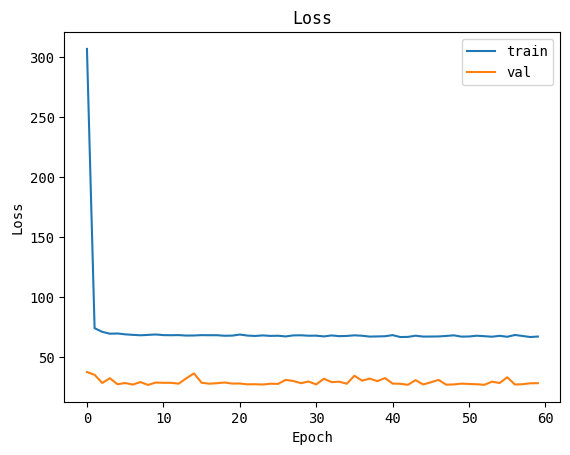

In [ ]:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(train_losses, label="train")
ax.plot(val_losses, label="val")
ax.legend()
ax.set_title("Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

In [ ]:
model.eval()
test_losses = []
predictions = []

with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        loss = criterion(output, target.unsqueeze(1))
        test_losses.append(loss.item() * len(data))
        predictions.append(output)
predictions = np.concatenate(predictions).ravel()
print(f"Test Loss: {sum(test_losses) / len(test_dataset)}")

Test Loss: 25.645868464903085


Text(0.5, 1.0, 'PM10')

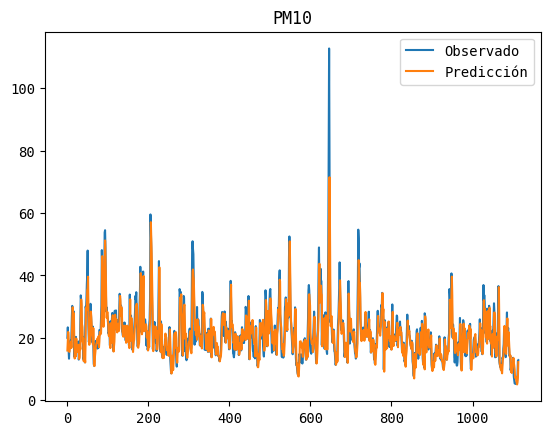

In [ ]:
fig, ax = plt.subplots()
ax.plot(test_label.values, label="Observado")
ax.plot(predictions, label="Predicción")
ax.legend()
ax.set_title("PM10")

In [ ]:
# Regresión lineal
coefs = poly.polyfit(test_label.values, predictions, 1)
ffit = poly.Polynomial(coefs)
ffit

Polynomial([6.5611525, 0.6718006], dtype=float32, domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

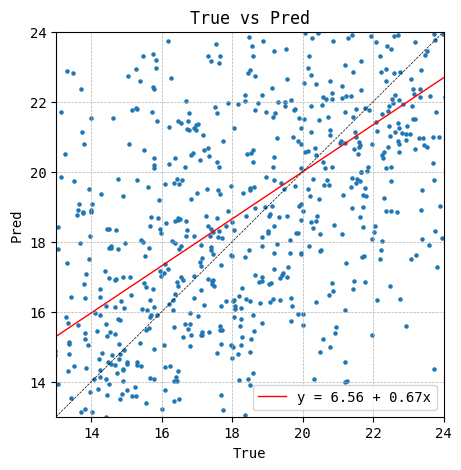

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(test_label.values, predictions, s=5)
ax.set_xlabel("True")
ax.set_ylabel("Pred")

x = np.linspace(13, 24, 100)
y = ffit(x)
ax.plot(x, y, color="red", lw=1, label=f"y = {coefs[0]:.2f} + {coefs[1]:.2f}x")

ax.legend()

ax.set_title("True vs Pred")
ax.set_xlim(13, 24)
ax.set_ylim(13, 24)

# linea de 45 grados
ax.plot([13, 24], [13, 24], ls="--", lw=0.5, color="black")

ax.grid(ls="--", lw=0.5)

# **IMPLEMENTACIÓN DE UNA RED NEURONAL ARTIFICIAL PARA PRONÓSTICO DEL INDICE ULTRAVIOLETA SOLAR**

https://www.datosabiertos.gob.pe/dataset/variables-ambientales-atmosfericas-del-observatorio-de-vigilancia-atmosf%C3%A9rica-marcapomacocha

In [ ]:
import requests
import pandas as pd
from io import StringIO

url = "https://www.datosabiertos.gob.pe/sites/default/files/Variables%20ambientales%20atmosfericas%20del%20Observatorio%20de%20Vigilancia%20Atmosf%C3%A9rica%20Marcapomacocha%20-%20%5BServicio%20Nacional%20de%20Meteorolog%C3%ADa%20e%20Hidrolog%C3%ADa%20del%20Per%C3%BA%20-%20SENAMHI%5D_0.csv"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/122.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    df = pd.read_csv(StringIO(response.text))
    print(df.head())
else:
    print(f"Error al descargar. Status code: {response.status_code}")


   ID        ESTACION     FECHA  LONGITUD   LATITUD  ALTITUD  O3  UV_MAX  PP  \
0   1  MARCAPOMACOCHA  20150601 -76.32508 -11.40443     4443 NaN     8.0 NaN   
1   2  MARCAPOMACOCHA  20150602 -76.32508 -11.40443     4443 NaN    10.0 NaN   
2   3  MARCAPOMACOCHA  20150603 -76.32508 -11.40443     4443 NaN    11.0 NaN   
3   4  MARCAPOMACOCHA  20150604 -76.32508 -11.40443     4443 NaN     9.0 NaN   
4   5  MARCAPOMACOCHA  20150605 -76.32508 -11.40443     4443 NaN     7.0 NaN   

  DEPARTAMENTO PROVINCIA        DISTRITO  UBIGEO  FECHA_CORTE  
0        JUNIN     YAULI  MARCAPOMACOCHA  120804     20240531  
1        JUNIN     YAULI  MARCAPOMACOCHA  120804     20240531  
2        JUNIN     YAULI  MARCAPOMACOCHA  120804     20240531  
3        JUNIN     YAULI  MARCAPOMACOCHA  120804     20240531  
4        JUNIN     YAULI  MARCAPOMACOCHA  120804     20240531  


In [ ]:
df['FECHA'] = pd.to_datetime(df['FECHA'], format='%Y%m%d').dt.strftime('%Y/%m/%d')

print(df['FECHA'])

0       2015/06/01
1       2015/06/02
2       2015/06/03
3       2015/06/04
4       2015/06/05
           ...    
3283    2024/05/27
3284    2024/05/28
3285    2024/05/29
3286    2024/05/30
3287    2024/05/31
Name: FECHA, Length: 3288, dtype: object


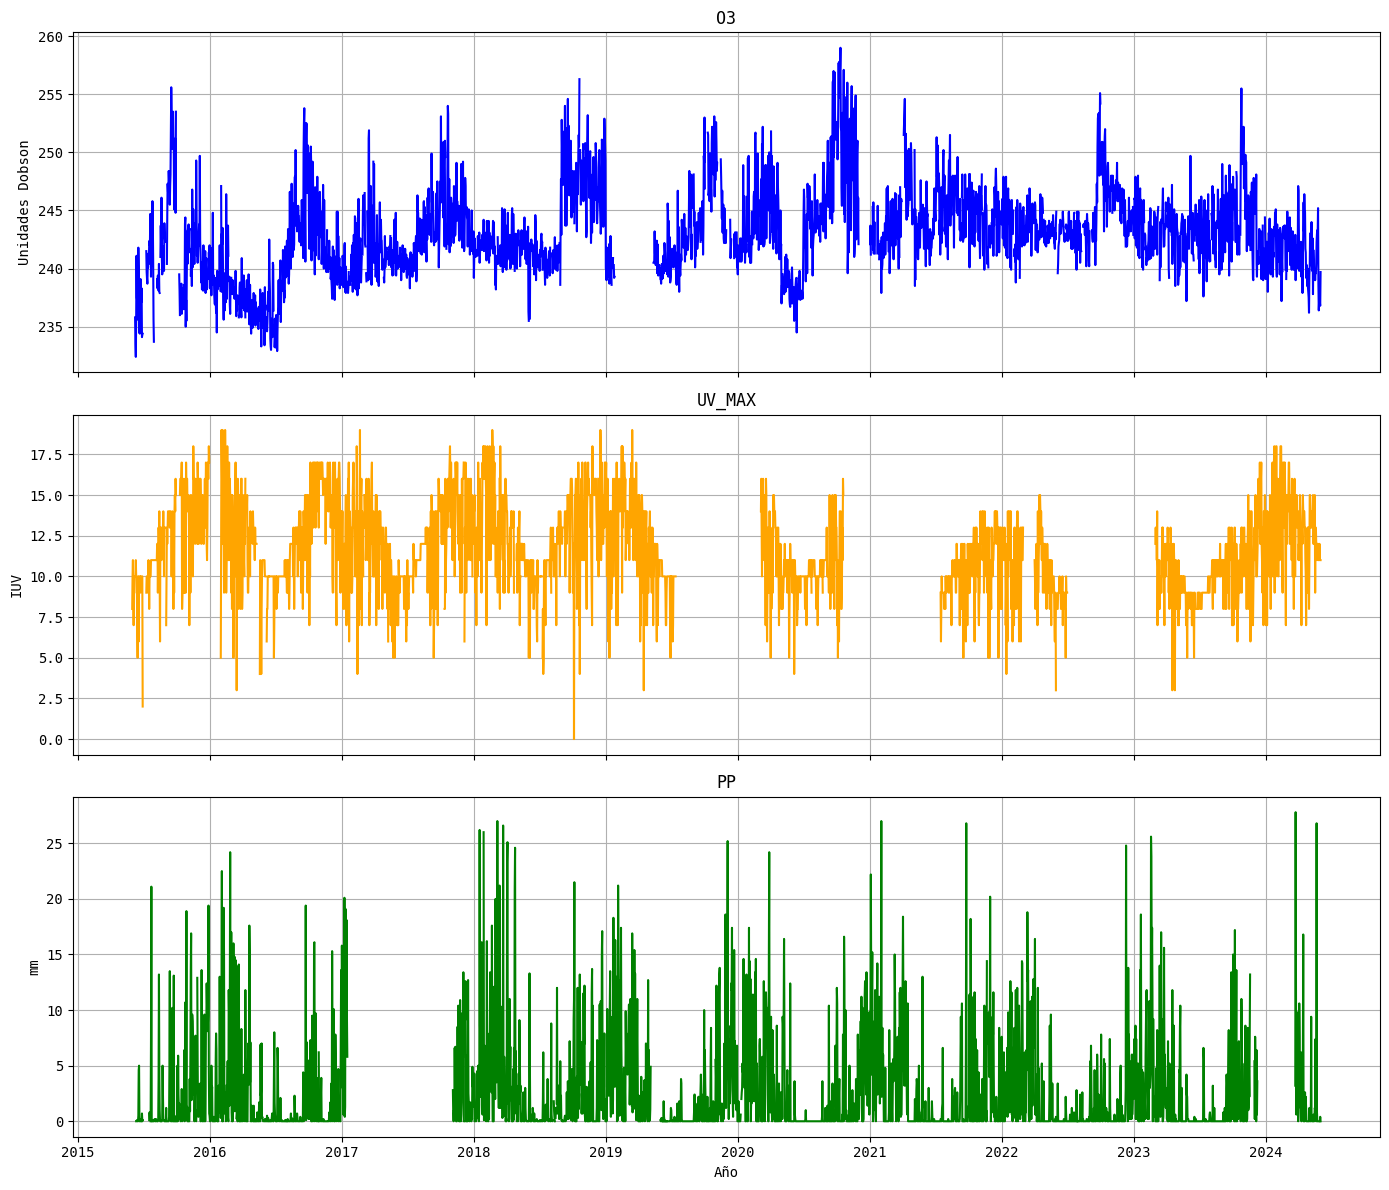

In [ ]:
df['FECHA'] = pd.to_datetime(df['FECHA'], format='%Y/%m/%d')

fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# O3 (unidades Dobson)
axs[0].plot(df['FECHA'], df['O3'], color='blue')
axs[0].set_ylabel('Unidades Dobson')
axs[0].set_title('O3')
axs[0].grid(True)

# UV_MAX (IUV, adimensional)
axs[1].plot(df['FECHA'], df['UV_MAX'], color='orange')
axs[1].set_ylabel('IUV')
axs[1].set_title('UV_MAX')
axs[1].grid(True)

# PP (milímetros)
axs[2].plot(df['FECHA'], df['PP'], color='green')
axs[2].set_ylabel('mm')
axs[2].set_title('PP')
axs[2].grid(True)

# Formatear eje x para mostrar años
plt.xlabel('Año')

plt.tight_layout()
plt.show()

In [ ]:
df = df
# Normalizar nombres de columnas
df.columns = df.columns.str.strip()
# Lista de variables
variables = ["O3", "PP", "UV_MAX"]

# -------------------------------
# 3. Convertir variables a numérico
# -------------------------------
for col in variables:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce", downcast="float")

# -------------------------------
# 4. Diagnóstico de valores faltantes
# -------------------------------
print("Valores faltantes por variables:\n", df[variables].isna().sum())

# -------------------------------
# 5. Limpieza de filas
# -------------------------------
# Opción A: eliminar filas donde TODOS los variables son NaN
df_lenient = df.dropna(subset=variables, how="all").copy()

# Opción B: eliminar filas donde CUALQUIER variables es NaN
df_strict = df.dropna(subset=variables, how="any").copy()

print("\nDimensiones (leniente):", df_lenient.shape)
print("Dimensiones (estricta):", df_strict.shape)

# -------------------------------
# 6. Seleccionar columnas finales
# -------------------------------
# -> aquí decides cuál opción usar (lenient o strict)
df_final = df_strict[["FECHA"] + variables]

# -------------------------------
# 7. Resultado
# -------------------------------
print("\nEjemplo de datos limpios:")
print(df_final.head())

Valores faltantes por variables:
 O3        353
PP        481
UV_MAX    865
dtype: int64

Dimensiones (leniente): (3279, 14)
Dimensiones (estricta): (1783, 14)

Ejemplo de datos limpios:
        FECHA          O3   PP  UV_MAX
11 2015-06-12  235.699997  0.0    10.0
12 2015-06-13  241.100006  0.0     9.0
13 2015-06-14  237.500000  0.1     9.0
14 2015-06-15  237.100006  0.1     7.0
15 2015-06-16  237.800003  0.0     5.0


In [ ]:
df.describe(exclude=[np.datetime64])

ID        ESTACION      LONGITUD       LATITUD  ALTITUD  \
count   3288.000000            3288  3.288000e+03  3.288000e+03   3288.0   
unique          NaN               1           NaN           NaN      NaN   
top             NaN  MARCAPOMACOCHA           NaN           NaN      NaN   
freq            NaN            3288           NaN           NaN      NaN   
mean    1644.349148             NaN -7.632508e+01 -1.140443e+01   4443.0   
std      949.050138             NaN  3.539041e-12  2.114186e-13      0.0   
min        1.000000             NaN -7.632508e+01 -1.140443e+01   4443.0   
25%      822.750000             NaN -7.632508e+01 -1.140443e+01   4443.0   
50%     1644.500000             NaN -7.632508e+01 -1.140443e+01   4443.0   
75%     2466.250000             NaN -7.632508e+01 -1.140443e+01   4443.0   
max     3257.000000             NaN -7.632508e+01 -1.140443e+01   4443.0   

                 O3       UV_MAX           PP DEPARTAMENTO PROVINCIA  \
count   2935.000000  2423.000000  2807.000000         3288      3288   
unique          NaN          NaN          NaN            1         1   
top             NaN          NaN          NaN        JUNIN     YAULI   
freq            NaN          NaN          NaN         3288      3288   
mean     243.087646    11.577383     2.611436          NaN       NaN   
std        3.763082     2.774717     4.399279          NaN       NaN   
min      232.399994     0.000000     0.000000          NaN       NaN   
25%      240.699997    10.000000     0.000000          NaN       NaN   
50%      242.699997    11.000000     0.200000          NaN       NaN   
75%      245.100006    13.000000     3.650000          NaN       NaN   
max      259.000000    19.000000    27.799999          NaN       NaN   

              DISTRITO    UBIGEO  FECHA_CORTE  
count             3288    3288.0       3288.0  
unique               1       NaN          NaN  
top     MARCAPOMACOCHA       NaN          NaN  
freq              3288       NaN          NaN  
mean               NaN  120804.0   20240531.0  
std                NaN       0.0          0.0  
min                NaN  120804.0   20240531.0  
25%                NaN  120804.0   20240531.0  
50%                NaN  120804.0   20240531.0  
75%                NaN  120804.0   20240531.0  
max                NaN  120804.0   20240531.0

In [ ]:
ProfileReport(df, title="Reporte - OBSERVATORIO DE VIGILANCIA ATMOSFÉRICA MARCAPOMACOCHA", explorative=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:00<00:00, 39.81it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

In [ ]:
df["next_UV_MAX"] = df["UV_MAX"].shift(-1)
df = df.dropna()
df

ID        ESTACION      FECHA  LONGITUD   LATITUD  ALTITUD  \
11      12  MARCAPOMACOCHA 2015-06-12 -76.32508 -11.40443     4443   
12      13  MARCAPOMACOCHA 2015-06-13 -76.32508 -11.40443     4443   
13      14  MARCAPOMACOCHA 2015-06-14 -76.32508 -11.40443     4443   
14      15  MARCAPOMACOCHA 2015-06-15 -76.32508 -11.40443     4443   
15      16  MARCAPOMACOCHA 2015-06-16 -76.32508 -11.40443     4443   
...    ...             ...        ...       ...       ...      ...   
3282  3257  MARCAPOMACOCHA 2024-05-26 -76.32508 -11.40443     4443   
3283  3257  MARCAPOMACOCHA 2024-05-27 -76.32508 -11.40443     4443   
3284  3257  MARCAPOMACOCHA 2024-05-28 -76.32508 -11.40443     4443   
3285  3257  MARCAPOMACOCHA 2024-05-29 -76.32508 -11.40443     4443   
3286  3257  MARCAPOMACOCHA 2024-05-30 -76.32508 -11.40443     4443   

              O3  UV_MAX   PP DEPARTAMENTO PROVINCIA        DISTRITO  UBIGEO  \
11    235.699997    10.0  0.0        JUNIN     YAULI  MARCAPOMACOCHA  120804   
12    241.100006     9.0  0.0        JUNIN     YAULI  MARCAPOMACOCHA  120804   
13    237.500000     9.0  0.1        JUNIN     YAULI  MARCAPOMACOCHA  120804   
14    237.100006     7.0  0.1        JUNIN     YAULI  MARCAPOMACOCHA  120804   
15    237.800003     5.0  0.0        JUNIN     YAULI  MARCAPOMACOCHA  120804   
...          ...     ...  ...          ...       ...             ...     ...   
3282  236.399994    11.0  0.0        JUNIN     YAULI  MARCAPOMACOCHA  120804   
3283  237.199997    11.0  0.0        JUNIN     YAULI  MARCAPOMACOCHA  120804   
3284  238.300003    12.0  0.0        JUNIN     YAULI  MARCAPOMACOCHA  120804   
3285  237.100006    11.0  0.0        JUNIN     YAULI  MARCAPOMACOCHA  120804   
3286  236.800003    11.0  0.4        JUNIN     YAULI  MARCAPOMACOCHA  120804   

      FECHA_CORTE  next_UV_MAX  
11       20240531          9.0  
12       20240531          9.0  
13       20240531          7.0  
14       20240531          5.0  
15       20240531         10.0  
...           ...          ...  
3282     20240531         11.0  
3283     20240531         12.0  
3284     20240531         11.0  
3285     20240531         11.0  
3286     20240531         11.0  

[1757 rows x 15 columns]

In [ ]:
train_size = int(len(df) * 0.7)
val_size = int(len(df) * 0.15)
test_size = len(df) - train_size - val_size

train_data = df[["O3", "PP", "UV_MAX"]].iloc[:train_size]
train_label = df["next_UV_MAX"].iloc[:train_size]

val_data = df[["O3", "PP", "UV_MAX"]].iloc[
    train_size : train_size + val_size
]
val_label = df["next_UV_MAX"].iloc[train_size : train_size + val_size]

test_data = df[["O3", "PP", "UV_MAX"]].iloc[
    train_size + val_size :
]
test_label = df["next_UV_MAX"].iloc[train_size + val_size :]

In [ ]:
mean = train_data.mean()
std = train_data.std()

train_data_standarized = (train_data - mean) / std
val_data_standarized = (val_data - mean) / std
test_data_standarized = (test_data - mean) / std

In [ ]:
class WeatherDataset(torch.utils.data.Dataset):
    def __init__(self, data_standarized, next_temp):
        self.input = data_standarized[["O3", "PP", "UV_MAX"]].values
        self.output = next_temp.values

    def __len__(self):
        return self.input.shape[0]

    def __getitem__(self, idx):
        return self.input[idx], self.output[idx]

In [ ]:
train_dataset = WeatherDataset(train_data_standarized, train_label)

val_dataset = WeatherDataset(val_data_standarized, val_label)

test_dataset = WeatherDataset(test_data_standarized, test_label)

train_loader = DataLoader(train_dataset, batch_size=20, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=20, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=20, shuffle=False)

In [ ]:
class WeatherModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [ ]:
# instanciamos el modelo
model = WeatherModel()

# instanciamos la función de pérdida
criterion = nn.MSELoss()

# instanciamos el optimizador
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# entrenamos el modelo
epochs = 60
train_losses = []
val_losses = []

for epoch in range(epochs):
    epoch_loss = []
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()

        # forward pass
        output = model(data)
        loss = criterion(output, target.unsqueeze(1))
        epoch_loss.append(loss.item() * data.size(0))

        # backward pass
        loss.backward()
        optimizer.step()

    model.eval()
    val_loss = []
    for data, target in val_loader:
        output = model(data)
        loss = criterion(output, target.unsqueeze(1))
        val_loss.append(loss.item() * data.size(0))

    # imprimimos la pérdida del epoch
    if (epoch + 1) % 20 == 0 or epoch == 0:
        print(
            f"Epoch {epoch + 1}/{epochs} - loss: {sum(epoch_loss) / len(train_dataset)} - val_loss: {sum(val_loss) / len(val_dataset)}"
        )
    train_losses.append(sum(epoch_loss) / len(train_dataset))
    val_losses.append(sum(val_loss) / len(val_dataset))

Epoch 1/60 - loss: 88.69714671213322 - val_loss: 14.010632155965943
Epoch 20/60 - loss: 5.26652758329064 - val_loss: 5.690773057393701
Epoch 40/60 - loss: 5.279192506054536 - val_loss: 5.260699487910978
Epoch 60/60 - loss: 5.130477789653036 - val_loss: 5.236590925731586


Text(0, 0.5, 'Loss')

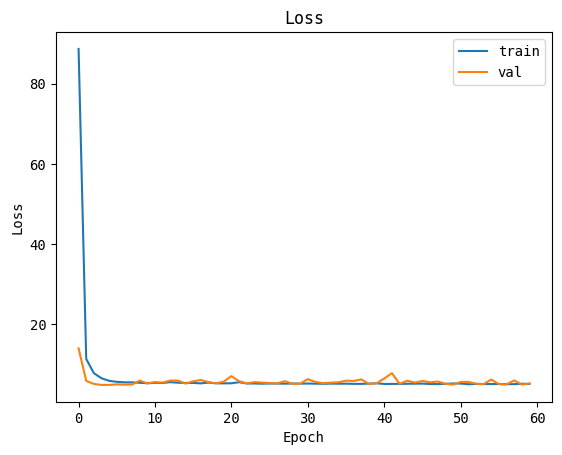

In [ ]:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(train_losses, label="train")
ax.plot(val_losses, label="val")
ax.legend()
ax.set_title("Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

In [ ]:
model.eval()
test_losses = []
predictions = []

with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        loss = criterion(output, target.unsqueeze(1))
        test_losses.append(loss.item() * len(data))
        predictions.append(output)
predictions = np.concatenate(predictions).ravel()
print(f"Test Loss: {sum(test_losses) / len(test_dataset)}")

Test Loss: 3.013659950697197


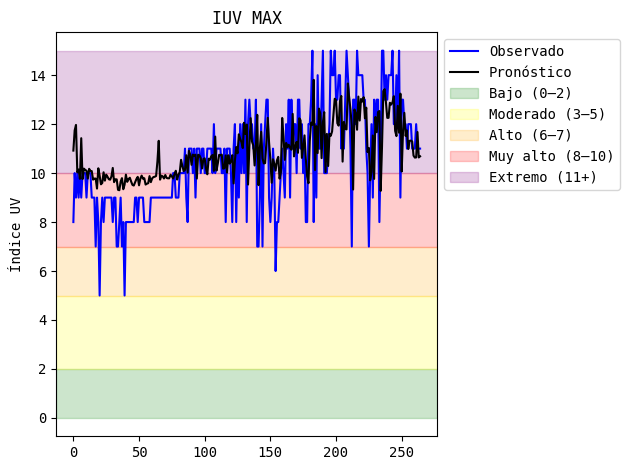

In [ ]:
fig, ax = plt.subplots()

# Series
ax.plot(test_label.values,color="blue", label="Observado")
ax.plot(predictions, color="black",label="Pronóstico")

# Rangos OMS
ax.axhspan(0, 2, color="green", alpha=0.2, label="Bajo (0–2)")
ax.axhspan(2, 5, color="yellow", alpha=0.2, label="Moderado (3–5)")
ax.axhspan(5, 7, color="orange", alpha=0.2, label="Alto (6–7)")
ax.axhspan(7, 10, color="red", alpha=0.2, label="Muy alto (8–10)")
ax.axhspan(10, max(max(test_label.values), max(predictions)),
           color="purple", alpha=0.2, label="Extremo (11+)")

# Estilo
ax.set_title("IUV MAX")
ax.set_ylabel("Índice UV")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))  # leyenda fuera si quieres

plt.tight_layout()
plt.show()

In [ ]:
# Regresión lineal
coefs = poly.polyfit(test_label.values, predictions, 1)
ffit = poly.Polynomial(coefs)
ffit

Polynomial([7.6719923 , 0.30231103], dtype=float32, domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

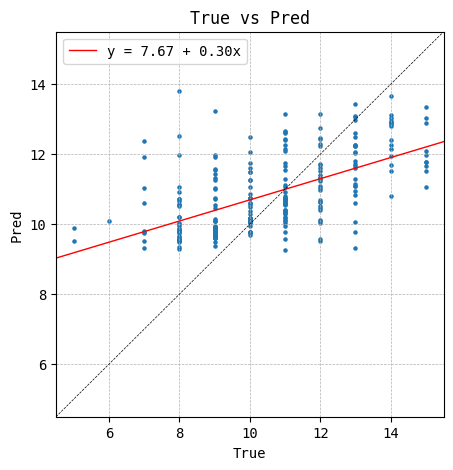

In [ ]:
# Calcular límites mínimos y máximos con un pequeño margen
min_val = min(test_label.min(), predictions.min())
max_val = max(test_label.max(), predictions.max())

margin = (max_val - min_val) * 0.05  # 5% de margen
xmin, xmax = min_val - margin, max_val + margin

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(test_label.values, predictions, s=5)
ax.set_xlabel("True")
ax.set_ylabel("Pred")

# Generar valores para la línea de regresión dentro del rango ajustado
x = np.linspace(xmin, xmax, 100)
y = ffit(x)
ax.plot(x, y, color="red", lw=1, label=f"y = {coefs[0]:.2f} + {coefs[1]:.2f}x")

ax.legend()

ax.set_title("True vs Pred")
ax.set_xlim(xmin, xmax)
ax.set_ylim(xmin, xmax)

# Línea de 45 grados (perfecta predicción)
ax.plot([xmin, xmax], [xmin, xmax], ls="--", lw=0.5, color="black")

ax.grid(ls="--", lw=0.5)

plt.show()